In [3]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
from urllib.request import urlopen
import urllib
import matplotlib.pyplot as plt

In [4]:
header= {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) ' 
      'AppleWebKit/537.11 (KHTML, like Gecko) '
      'Chrome/23.0.1271.64 Safari/537.11',
      'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
      'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
      'Accept-Encoding': 'none',
      'Accept-Language': 'en-US,en;q=0.8',
      'Connection': 'keep-alive'}

req = urllib.request.Request(url='https://www.rottentomatoes.com/top/bestofrt/?year=2021', headers=header) 
page = urllib.request.urlopen(req).read()


In [5]:
soup = BeautifulSoup(page, "html.parser")

In [6]:
movie_name = []
movie_rate = []
movie_review = []


movie_rawname = soup.find_all('a','unstyled articleLink')
movie_rawrate = soup.find_all('span','tMeterIcon tiny')
movie_rawreview = soup.find_all('td','right hidden-xs')

for i in range(43,143):
    movie_name.append(movie_rawname[i].string[13:-7])
    
for i in range(100):
    movie_rate.append(re.split(('\n'),movie_rawrate[i].get_text())[2][1:-1])
    movie_review.append(movie_rawreview[i].get_text())


In [7]:
df = pd.DataFrame({'Name':movie_name,'Rate(%)':movie_rate,'Review':movie_review},index=pd.RangeIndex(1,101))
df.style.set_properties(**{'text-align': 'left'})

,Name,Rate(%),Review
1,Nomadland,93,419
2,Judas and the Black Messiah,96,340
3,The Father,98,282
4,In the Heights,94,351
5,"Summer of Soul (...Or, When the Revolution Could Not Be Televised)",99,204
6,Pig,97,241
7,The Power of the Dog,96,259
8,CODA,96,247
9,Raya and the Last Dragon,94,283
10,The Mitchells vs. The Machines,98,183


In [8]:
df['Rate(%)'] = df['Rate(%)'].astype(int)
df['Review'] = df['Review'].astype(int)

In [9]:
most_reviewed_movies_2021 = df.sort_values(['Review'], ascending=False)
most_reviewed_movies_2021.head(10)

,Name,Rate(%),Review
81,Black Widow,79,437
40,Dune,83,436
1,Nomadland,93,419
47,No Time To Die,84,389
12,The Suicide Squad,90,359
4,In the Heights,94,351
11,A Quiet Place Part II,91,349
2,Judas and the Black Messiah,96,340
13,Shang-Chi and the Legend of the Ten Rings,91,320
77,Candyman,84,320


In [10]:
most_rated_movies_2021 = df.sort_values(['Rate(%)'], ascending=True)
most_rated_movies_2021.head(10)

,Name,Rate(%),Review
81,Black Widow,79,437
40,Dune,83,436
47,No Time To Die,84,389
77,Candyman,84,320
87,The Last Duel,86,257
96,Titane,88,190
99,"tick, tick...Boom!",88,181
74,Zola,88,231
80,Supernova,89,197
37,The Green Knight,89,302


In [11]:
import urllib

In [12]:
years = range(2010,2022)

In [13]:
movie_year = []
movie_name = []
movie_rate = []
movie_review = []

years = range(2017,2022)

for year in years:
    html = "https://www.rottentomatoes.com/top/bestofrt/?year={date}"
    response = urlopen(html.format(date = year))
    soup = BeautifulSoup(response, "html.parser")
    
    movie_year.extend([year for n in range(0,100)])
    movie_name.extend([soup.find_all('a', 'unstyled articleLink')[i].string[13:-7] for i in range(43,143)])
    movie_rate.extend([re.split(('\n'),soup.find_all('span','tMeterIcon tiny')[i].get_text())[2][1:-1] for i in range(0,100)]) 
    movie_review.extend([soup.find_all('td','right hidden-xs')[i].get_text() for i in range(0,100)])
    

In [14]:
movie = pd.DataFrame({'Year':movie_year,'Name':movie_name,'Rate(%)':movie_rate, 'Review':movie_review})
movie['Rate(%)'] = movie['Rate(%)'].astype(int)
movie['Review'] = movie['Review'].astype(int)

In [15]:
mostReviewed= movie.sort_values(['Review'], ascending=False)
mostReviewed.head(10)

,Year,Name,Rate(%),Review
212,2019,Once Upon a Time In Hollywood,85,571
203,2019,Us,93,553
201,2019,Avengers: Endgame,94,547
231,2019,Captain Marvel,79,543
105,2018,A Star Is Born,90,528
100,2018,Black Panther,96,525
122,2018,Avengers: Infinity War,85,485
6,2017,Star Wars: The Last Jedi,91,482
2,2017,Wonder Woman,93,471
202,2019,Knives Out,97,467


In [16]:
lowrated= movie.sort_values(['Rate(%)'], ascending=True)
lowrated.head(10)

,Year,Name,Rate(%),Review
231,2019,Captain Marvel,79,543
398,2020,Birds of Prey (And the Fantabulous Emancipatio...,79,430
480,2021,Black Widow,79,437
199,2018,Mary Poppins Returns,80,377
287,2019,Jojo Rabbit,80,423
99,2017,Detroit,82,304
260,2019,Midsommar,83,398
439,2021,Dune,83,436
97,2017,Silence,83,286
262,2019,Ad Astra,83,393


Text(0.5, 0, 'Number of review')

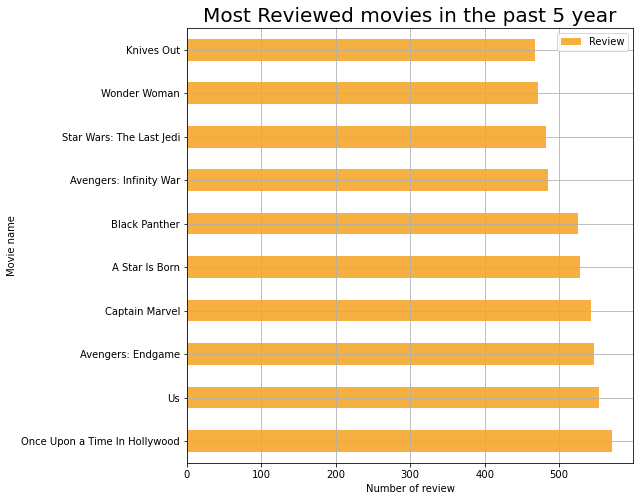

In [17]:
movie_unique = pd.pivot_table(movie, values='Review' ,index=['Name'])
movie_best = movie_unique.sort_values(by='Review', ascending=False)
data = movie_best.head(10)

data.plot(kind = 'barh', grid =True, figsize = (8,8), color = '#F5B041')
plt.title("Most Reviewed movies in the past 5 year", fontsize = 20)
plt.ylabel("Movie name")
plt.xlabel("Number of review")

Text(0.5, 0, 'Rate')

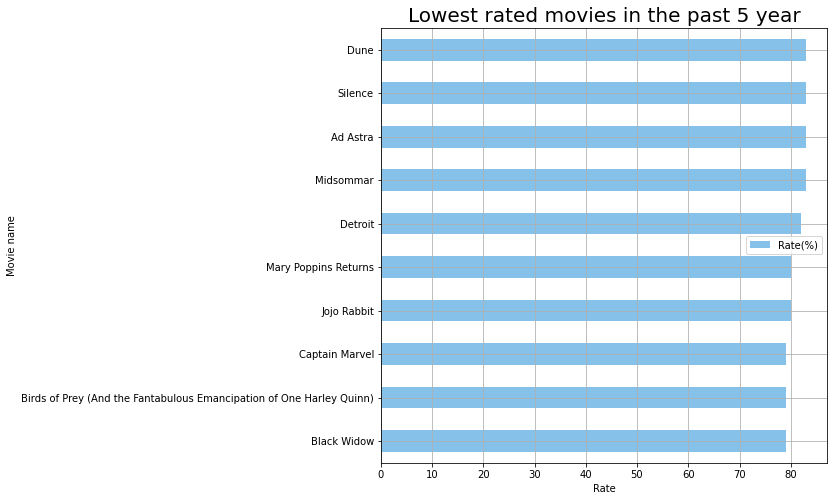

In [18]:
movie_unique = pd.pivot_table(movie, values='Rate(%)',index=['Name'])
movie_lowrate = movie_unique.sort_values(by='Rate(%)',ascending = True)
data = movie_lowrate.head(10)

data.plot(kind = 'barh', grid =True, figsize = (8,8), color = '#85C1E9')
plt.title("Lowest rated movies in the past 5 year", fontsize = 20)
plt.ylabel("Movie name")
plt.xlabel("Rate")